In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (8.0, 7.0)
plt.rcParams['font.size'] = 15

train_dir = os.path.join(os.getcwd(), 'AI_workshop/data/flower_dataset/dataset/train')
test_dir = os.path.join(os.getcwd(), 'AI_workshop/data/flower_dataset/dataset/test')

In [16]:
def plot_photos(category):
    # define location of dataset
    folder = train_dir + '/' + category + "/"
    # plot first few images
    for i in range(9):
        # define subplot
        plt.subplot(330 + 1 + i)
        # define filename
        filename = random.choice(os.listdir(folder))
        # load image pixels
        image = imread(folder + filename)
        # plot raw pixel data
        plt.imshow(image)
    # show the figure
    plt.show()

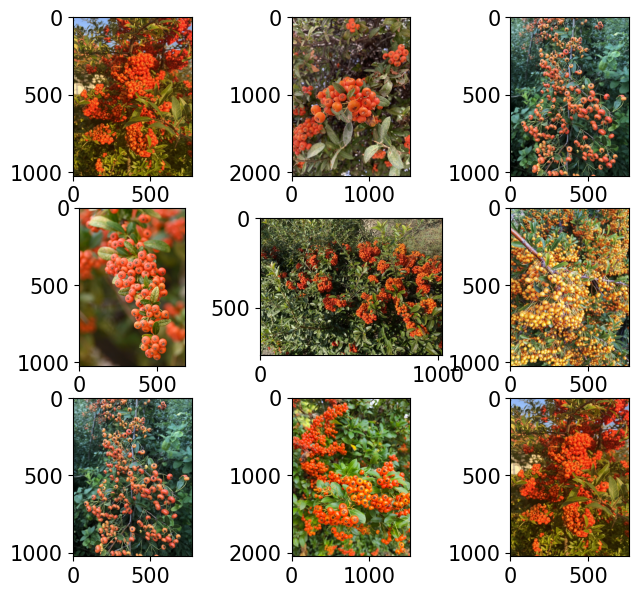

In [17]:
plot_photos('firethorn')

In [18]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
import keras.layers as layers
import warnings

warnings.filterwarnings('ignore')

In [19]:
%config Completer.use_jedi = False

In [20]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 50,
                                                 class_mode = 'categorical', shuffle=True,
                                                 classes=[class_name for class_name in os.listdir(train_dir) if class_name != '.ipynb_checkpoints'])

Found 341 images belonging to 5 classes.


In [22]:
training_set.class_indices

{'rose': 0,
 'common-dandelion': 1,
 'firethorn': 2,
 'sunflower': 3,
 'corn-poppy': 4}

In [23]:
training_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [29]:
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (64, 64),
                                            batch_size = 50,
                                            class_mode = 'categorical',  shuffle=False,
                                           classes=[class_name for class_name in os.listdir(train_dir) if class_name != '.ipynb_checkpoints'])

Found 126 images belonging to 5 classes.


In [34]:
classifier = Sequential()
#step1-convolution
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))
#step2-maxpooling
classifier.add(MaxPooling2D(pool_size=(2,2)))
#step3-convolution
classifier.add(Convolution2D(32,3,3,activation='relu'))
#step4-flattening
classifier.add(Flatten())
#step5-fullconnection
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(5,activation='softmax'))

In [35]:
classifier.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [36]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 10, 10, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 flatten_3 (Flatten)         (None, 288)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               36992     
                                                                 
 dense_7 (Dense)             (None, 5)                 645       
                                                      

In [40]:
classifier_fit = classifier.fit(training_set,
                                 steps_per_epoch=6,
                                 epochs=10,
                                 validation_data=test_set)

Epoch 1/10
6/6 [==============================] - 1s 114ms/step - loss: 0.5165 - accuracy: 0.7938 - val_loss: 0.6332 - val_accuracy: 0.7302
Epoch 2/10
6/6 [==============================] - 1s 110ms/step - loss: 0.5096 - accuracy: 0.7904 - val_loss: 0.5542 - val_accuracy: 0.7937
Epoch 3/10
6/6 [==============================] - 1s 97ms/step - loss: 0.4676 - accuracy: 0.8110 - val_loss: 0.6055 - val_accuracy: 0.7540
Epoch 4/10
6/6 [==============================] - 1s 98ms/step - loss: 0.4460 - accuracy: 0.8110 - val_loss: 0.5658 - val_accuracy: 0.7698
Epoch 5/10
6/6 [==============================] - 1s 106ms/step - loss: 0.4331 - accuracy: 0.8247 - val_loss: 0.5685 - val_accuracy: 0.7698
Epoch 6/10
6/6 [==============================] - 1s 103ms/step - loss: 0.4072 - accuracy: 0.8110 - val_loss: 0.5480 - val_accuracy: 0.7698
Epoch 7/10
6/6 [==============================] - 1s 105ms/step - loss: 0.3746 - accuracy: 0.8488 - val_loss: 0.5206 - val_accuracy: 0.8095
Epoch 8/10
6/6 [======

In [48]:
# evaluate model
_, acc = classifier.evaluate_generator(test_set, steps=len(test_set), verbose=1)
print('> %.3f' % (acc * 100.0))

3/3 [==============================] - 0s 57ms/step - loss: 0.5585 - accuracy: 0.7778
> 77.778


In [49]:
Y_pred = classifier.predict_generator(test_set)
y_predict = np.argmax(Y_pred, axis=1)

In [ ]:
import keras
classifier.save('classifier.keras')

1/1 [==============================] - 0s 18ms/step
[[1.1594869e-01 3.8437080e-04 6.6055489e-01 1.2221325e-01 1.0089875e-01]]


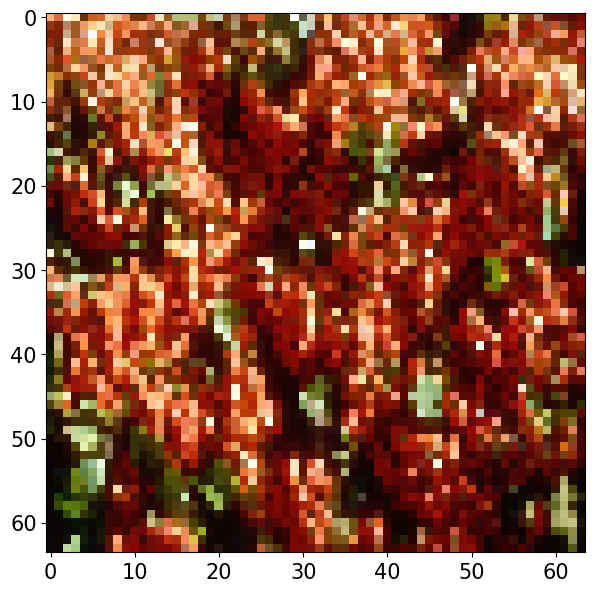

In [59]:
from keras.utils import load_img, img_to_array
predict = load_img(train_dir+ '/firethorn/large (13).jpg', target_size = (64, 64))
predict_modified = img_to_array(predict)
predict_modified = predict_modified / 255
predict_modified = np.expand_dims(predict_modified, axis = 0)
result = classifier.predict(predict_modified)
plt.imshow(predict)
print(result)


In [60]:
# Example class labels mapping
class_labels_mapping = {
    0: 'rose',
    1: 'common-dandelion',
    2: 'firethorn',
    3: 'sunflower',
    4: 'corn-poppy'
}

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(result)

# Get the corresponding class label from the mapping
predicted_class_label = class_labels_mapping[predicted_class_index]

print("Predicted class:", predicted_class_label)

Predicted class: firethorn
